# Project: Investigate A TMDB-Movies-Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

This dataset originates from IMDB and comprises information from The Movie Database (TMDb) on 10,000 movies, short films, and television shows, including user ratings, revenue, runtime, and budget.
I'll be addressing the following questions in this project:

Q1:what is the best month to release movie or show?

Q2:What's the relation between runtime and the vote avarage?

Q3:What genres of movies or shows that have high revenue?

Q4:What percentage do the 5 genres make up?

In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np
% matplotlib inline
# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


In [2]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

Requirement already up-to-date: pandas==0.25.0 in /opt/conda/lib/python3.6/site-packages (0.25.0)


<a id='wrangling'></a>
## Data Wrangling


### I Will Explore General Properties of the Dataset


In [3]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df=pd.read_csv('tmdb-movies.csv')
df.head(1)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09



### Data Cleaning-Remove Unecessary Columns

remove columns that not necessarily to answer the questions (budget,revenue,homepage,tagline,keywords,overview,production_companies,release_year,cast,director)

In [4]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.
df.drop(['budget','revenue','homepage','tagline','keywords','overview','production_companies','release_year','cast','director'],axis=1,inplace = True)
df.columns


Index(['id', 'imdb_id', 'popularity', 'original_title', 'runtime', 'genres',
       'release_date', 'vote_count', 'vote_average', 'budget_adj',
       'revenue_adj'],
      dtype='object')

In [5]:
#explore data
df.describe()

,id,popularity,runtime,vote_count,vote_average,budget_adj,revenue_adj
count,10866.000000,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,102.070863,217.389748,5.974922,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,31.381405,575.619058,0.935142,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000,10.000000,1.500000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,90.000000,17.000000,5.400000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,99.000000,38.000000,6.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,111.000000,145.750000,6.600000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,900.000000,9767.000000,9.200000,4.250000e+08,2.827124e+09


### Data Cleaning-Filling 0 Values
as we there is some columns contain 0 values (revenue_adj,budget_adj,runtime) so,i solve this problem by the average of these columns

In [6]:
#average of runtime
df['runtime'].mean()

102.07086324314375

In [7]:
df['runtime']=df['runtime'].replace(0,102.07086324314375)

In [8]:
#average of budget_adj
df['budget_adj'].mean()

17551039.82288678

In [9]:
df['budget_adj']=df['budget_adj'].replace(0,17551039.82288678)

In [10]:
#average of revenue_adj
df['revenue_adj'].mean()

51364363.25325099

In [11]:
df['revenue_adj']=df['revenue_adj'].replace(0,51364363.25325099)

In [12]:
df.describe()

,id,popularity,runtime,vote_count,vote_average,budget_adj,revenue_adj
count,10866.000000,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,102.362065,217.389748,5.974922,2.675136e+07,7.980243e+07
std,92130.136561,1.000185,30.902781,575.619058,0.935142,3.050850e+07,1.365610e+08
min,5.000000,0.000065,2.000000,10.000000,1.500000,9.210911e-01,2.370705e+00
25%,10596.250000,0.207583,90.000000,17.000000,5.400000,1.755104e+07,5.136436e+07
50%,20669.000000,0.383856,99.000000,38.000000,6.000000,1.755104e+07,5.136436e+07
75%,75610.000000,0.713817,111.000000,145.750000,6.600000,2.085325e+07,5.136436e+07
max,417859.000000,32.985763,900.000000,9767.000000,9.200000,4.250000e+08,2.827124e+09


### Data Cleaning-Remove Duplictes
Find and remove duplicate rows

In [13]:
#find no.duplicates rows
sum(df.duplicated())

1

In [14]:
df.drop_duplicates(inplace=True)

### Data Cleaning-Datatypes
Column datatypes should be changed to the relevant types. For example,'release date' must be a datetime.

In [15]:
df.dtypes

id                  int64
imdb_id            object
popularity        float64
original_title     object
runtime           float64
genres             object
release_date       object
vote_count          int64
vote_average      float64
budget_adj        float64
revenue_adj       float64
dtype: object

In [16]:
df['release_date']=pd.to_datetime(df['release_date'])
df.dtypes

id                         int64
imdb_id                   object
popularity               float64
original_title            object
runtime                  float64
genres                    object
release_date      datetime64[ns]
vote_count                 int64
vote_average             float64
budget_adj               float64
revenue_adj              float64
dtype: object

<a id='eda'></a>
## Exploratory Data Analysis


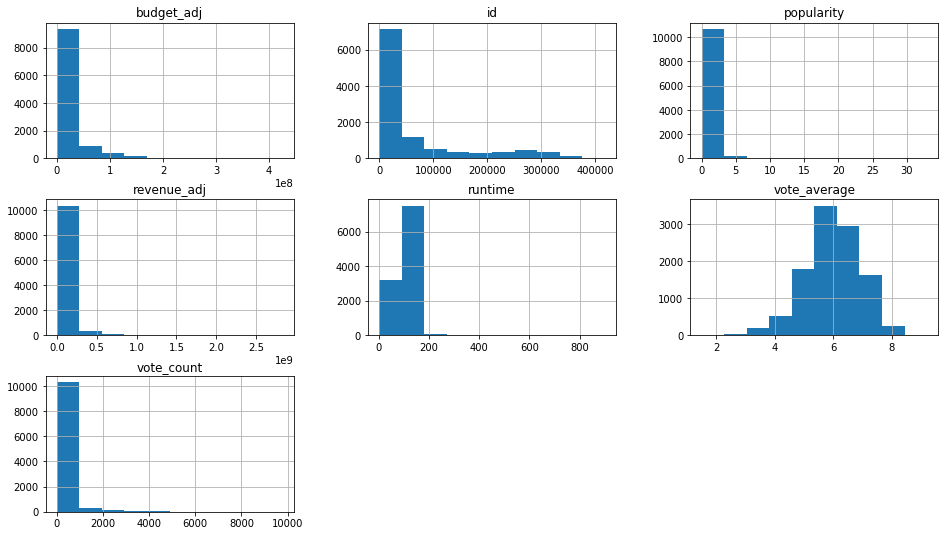

In [17]:
#explore how data histogram look like and gain from it some informations
df.hist(figsize=(16,9));

### Q1:what is the best month to release movie or show?

"Best" is a term used to describe films with the highest box office receipts. So I'll look into which months generate the most revenue.

In [18]:
# I will make a new columen called month then take it's values from release_date
df['month']=df['release_date'].apply(lambda x: x.month)
df.head()

,id,imdb_id,popularity,original_title,runtime,genres,release_date,vote_count,vote_average,budget_adj,revenue_adj,month
0,135397,tt0369610,32.985763,Jurassic World,124.0,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.5,1.379999e+08,1.392446e+09,6
1,76341,tt1392190,28.419936,Mad Max: Fury Road,120.0,Action|Adventure|Science Fiction|Thriller,2015-05-13,6185,7.1,1.379999e+08,3.481613e+08,5
2,262500,tt2908446,13.112507,Insurgent,119.0,Adventure|Science Fiction|Thriller,2015-03-18,2480,6.3,1.012000e+08,2.716190e+08,3
3,140607,tt2488496,11.173104,Star Wars: The Force Awakens,136.0,Action|Adventure|Science Fiction|Fantasy,2015-12-15,5292,7.5,1.839999e+08,1.902723e+09,12
4,168259,tt2820852,9.335014,Furious 7,137.0,Action|Crime|Thriller,2015-04-01,2947,7.3,1.747999e+08,1.385749e+09,4


In [19]:
#Groupby month and revenue
month_revenue=df.groupby('month')['revenue_adj'].sum()
month_revenue

month
1     4.910687e+10
2     4.235442e+10
3     6.385725e+10
4     5.487055e+10
5     8.423232e+10
6     1.021322e+11
7     7.987658e+10
8     5.757434e+10
9     6.804293e+10
10    7.424615e+10
11    8.171477e+10
12    1.091239e+11
Name: revenue_adj, dtype: float64

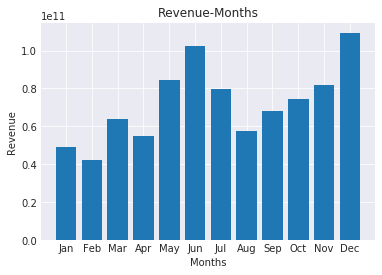

In [20]:
# Plot the result by function
labels=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
def revenue_month (df,label):
    sb.set_style('darkgrid')
    plt.bar([1,2,3,4,5,6,7,8,9,10,11,12],df,tick_label=label)
    plt.xlabel('Months')
    plt.ylabel('Revenue')
    plt.title('Revenue-Months');
revenue_month(month_revenue,labels)

The largest income for movie releases is seen between June and December, according to this graph. However, in order to be certain, I must examine the quantity of movie releases each month, as a few high-grossing films might distort the statistics.

In [21]:
df['month'].value_counts()

9     1331
10    1153
12     985
1      919
8      918
6      827
3      822
11     814
5      809
7      799
4      797
2      691
Name: month, dtype: int64

In [22]:
df['month'].value_counts().mean()

905.4166666666666

Despite the fact that the number of movie releases varies from 691 to 1331, June and December are close to the average of 905.5 releases per month. This indicates there isn't enough evidence to determine that the data was distorted by a few high-earning films, or that there were more films released during those months.
As a result, we can still infer that June and December are "superior" months to distribute films because they will most likely bring in the greatest money.

### Q2:What's the relation between runtime and the vote avarage?

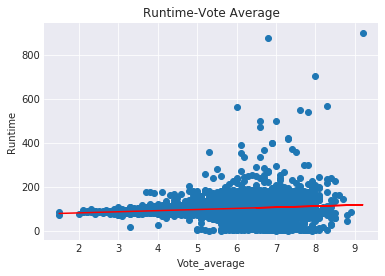

In [35]:
#plot relation between runtime and the average by function
import matplotlib.pyplot as plt
from scipy import stats

x = df['vote_average']
y = df['runtime']

slope, intercept, r, p, std_err = stats.linregress(x, y)

def myfunc(x):
  return slope * x + intercept

mymodel = list(map(myfunc, x))

plt.scatter(x, y)
plt.plot(x, mymodel,'r')
plt.xlabel('Vote_average')
plt.ylabel('Runtime')
plt.title('Runtime-Vote Average');
plt.show()



<h4>From this plot we can understand many thoughts</h4>

If it's a short film, the rating will most likely be in the mid-to-high range.
Films with a length of roughly 100 minutes have a wide range of ratings, ranging from poor to high.

Films/shows with a runtime of more than or less than 100 minutes tend to earn higher ratings.

Ratings for television series (or movies with extensive runtimes) are consistently higher than average.

### Q3:What genres of movies or shows that have high revenue?
Because most movies and series have many genres, I need to make sure that each row only includes one.

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 12 columns):
id                10865 non-null int64
imdb_id           10855 non-null object
popularity        10865 non-null float64
original_title    10865 non-null object
runtime           10865 non-null float64
genres            10842 non-null object
release_date      10865 non-null datetime64[ns]
vote_count        10865 non-null int64
vote_average      10865 non-null float64
budget_adj        10865 non-null float64
revenue_adj       10865 non-null float64
month             10865 non-null int64
dtypes: datetime64[ns](1), float64(5), int64(3), object(3)
memory usage: 1.1+ MB


In [25]:
#drop nan values from genres column
df=df.dropna(subset=['genres'],axis=0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10842 entries, 0 to 10865
Data columns (total 12 columns):
id                10842 non-null int64
imdb_id           10834 non-null object
popularity        10842 non-null float64
original_title    10842 non-null object
runtime           10842 non-null float64
genres            10842 non-null object
release_date      10842 non-null datetime64[ns]
vote_count        10842 non-null int64
vote_average      10842 non-null float64
budget_adj        10842 non-null float64
revenue_adj       10842 non-null float64
month             10842 non-null int64
dtypes: datetime64[ns](1), float64(5), int64(3), object(3)
memory usage: 1.1+ MB


In [26]:
#afterthat split the genres columns by the (|) and make every genre new column
genres=df['genres'].str.split('|',expand=True).rename(columns= lambda x:'genres'+str(x+1))

In [27]:
#remove the old genres and add new one
df.drop('genres',axis=1,inplace=True)
df=pd.merge(df,genres,left_index=True,right_index=True,how='inner')

/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:4097: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [28]:
#showing the top 10 revenues
top10=df.nlargest(10,'revenue_adj')
top10

,id,imdb_id,popularity,original_title,runtime,release_date,vote_count,vote_average,budget_adj,revenue_adj,month,genres1,genres2,genres3,genres4,genres5
1386,19995,tt0499549,9.432768,Avatar,162.0,2009-12-10,8458,7.1,2.408869e+08,2.827124e+09,12,Action,Adventure,Fantasy,Science Fiction,None
1329,11,tt0076759,12.037933,Star Wars,121.0,1977-03-20,4428,7.9,3.957559e+07,2.789712e+09,3,Adventure,Action,Science Fiction,None,None
5231,597,tt0120338,4.355219,Titanic,194.0,1997-11-18,4654,7.3,2.716921e+08,2.506406e+09,11,Drama,Romance,Thriller,None,None
10594,9552,tt0070047,2.010733,The Exorcist,122.0,1973-12-26,1113,7.2,3.928928e+07,2.167325e+09,12,Drama,Horror,Thriller,None,None
9806,578,tt0073195,2.563191,Jaws,124.0,1975-06-18,1415,7.3,2.836275e+07,1.907006e+09,6,Horror,Thriller,Adventure,None,None
3,140607,tt2488496,11.173104,Star Wars: The Force Awakens,136.0,2015-12-15,5292,7.5,1.839999e+08,1.902723e+09,12,Action,Adventure,Science Fiction,Fantasy,None
8889,601,tt0083866,2.900556,E.T. the Extra-Terrestrial,115.0,1982-04-03,1830,7.2,2.372625e+07,1.791694e+09,4,Science Fiction,Adventure,Family,Fantasy,None
8094,1642,tt0113957,1.136610,The Net,114.0,1995-07-28,201,5.6,3.148127e+07,1.583050e+09,7,Crime,Drama,Mystery,Thriller,Action
10110,12230,tt0055254,2.631987,One Hundred and One Dalmatians,79.0,2061-01-25,913,6.6,2.917944e+07,1.574815e+09,1,Adventure,Animation,Comedy,Family,None
4361,24428,tt0848228,7.637767,The Avengers,143.0,2012-04-25,8903,7.3,2.089437e+08,1.443191e+09,4,Science Fiction,Action,Adventure,None,None


In [29]:
#i will group the genres by type and the count the number  of times of each 
#fristly create a copy of df and remove all not necessarily columns
copydf=top10.copy()
copydf.drop(['id', 'imdb_id', 'popularity', 'original_title', 'runtime',
       'release_date', 'vote_count', 'vote_average', 'budget_adj','month',
       'revenue_adj'],axis=1,inplace=True)
df2=copydf.melt()

In [30]:
#Then I'll aggregate the genres using crosstab and give it to a separate df.
df3=pd.crosstab(index=df2['value'],columns=df2['variable'])
df3

variable,genres1,genres2,genres3,genres4,genres5
value,,,,,
Action,2,2,0,0,1
Adventure,2,3,2,0,0
Animation,0,1,0,0,0
Comedy,0,0,1,0,0
Crime,1,0,0,0,0
Drama,2,1,0,0,0
Family,0,0,1,1,0
Fantasy,0,0,1,2,0
Horror,1,1,0,0,0


In [31]:
#create a new column of total of each genre
df3['totals']=df3['genres1']+df3['genres2']+df3['genres3']+df3['genres4']+df3['genres5']
df3

variable,genres1,genres2,genres3,genres4,genres5,totals
value,,,,,,
Action,2,2,0,0,1,5
Adventure,2,3,2,0,0,7
Animation,0,1,0,0,0,1
Comedy,0,0,1,0,0,1
Crime,1,0,0,0,0,1
Drama,2,1,0,0,0,3
Family,0,0,1,1,0,2
Fantasy,0,0,1,2,0,3
Horror,1,1,0,0,0,2


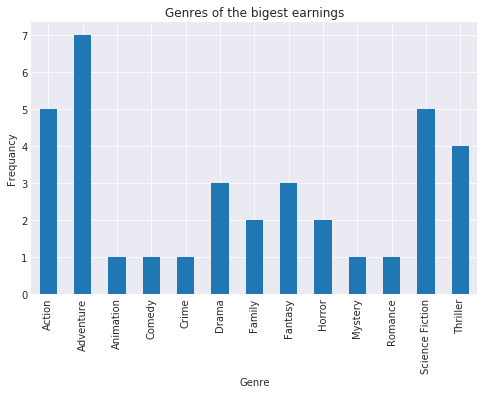

In [32]:
#plot the bar chart
df3['totals'].plot(kind='bar',figsize=(8,5))
plt.title('Genres of the bigest earnings')
plt.xlabel('Genre')
plt.ylabel('Frequancy');

We can observe from this bar chart that Adventure (7), Action (5), and Science Fiction are the three most often occurring genres among the highest-grossing films/shows (5).

If you're a movie studio, this data might help you figure out which genres appear on the "top revenue generating" list more frequently than others.

### Q4:What percentage do the 5 genres make up?

In [33]:
# i will use same technique done by me eailer to count all genres
copydf1=df.copy()
copydf1.drop(['id', 'imdb_id', 'popularity', 'original_title', 'runtime',
       'release_date', 'vote_average', 'budget_adj','month',
       'revenue_adj','vote_count'],axis=1,inplace=True)
df4=copydf1.melt()
#after i will use the crosstab togroup the genres
df5=pd.crosstab(index=df4['value'],columns=df4['variable'])
df5

variable,genres1,genres2,genres3,genres4,genres5
value,,,,,
Action,1590,544,198,42,10
Adventure,586,626,183,62,14
Animation,403,207,80,6,3
Comedy,2319,990,388,81,15
Crime,380,449,350,152,23
Documentary,432,77,8,3,0
Drama,2453,1618,546,124,19
Family,144,448,401,178,60
Fantasy,272,304,190,109,41


In [34]:
#getting total and assign it to new column in df
df5['totals']=df5['genres1']+df5['genres2']+df5['genres3']+df5['genres4']+df5['genres5']

In [35]:
#identify the best 5 genres
top5=df5.nlargest(5,'totals')
top5

variable,genres1,genres2,genres3,genres4,genres5,totals
value,,,,,,
Drama,2453,1618,546,124,19,4760
Comedy,2319,990,388,81,15,3793
Thriller,491,961,886,449,120,2907
Action,1590,544,198,42,10,2384
Romance,186,704,583,194,45,1712


In [36]:
#drop top five genre from our df
df5.drop(['Drama','Comedy','Thriller','Action','Romance'],inplace=True)

In [37]:
#get the sum of other genres
df5['totals'].sum()

11399

In [38]:
#append the sum of other genres as a new row in df
c=top5.append({'totals':11399},ignore_index=True)
c

variable,genres1,genres2,genres3,genres4,genres5,totals
0,2453.0,1618.0,546.0,124.0,19.0,4760.0
1,2319.0,990.0,388.0,81.0,15.0,3793.0
2,491.0,961.0,886.0,449.0,120.0,2907.0
3,1590.0,544.0,198.0,42.0,10.0,2384.0
4,186.0,704.0,583.0,194.0,45.0,1712.0
5,NaN,NaN,NaN,NaN,NaN,11399.0


In [39]:
#label the unnamed indexs
c.index=['Drama','Comedy','Thriller','Action','Romance','Other']
c

variable,genres1,genres2,genres3,genres4,genres5,totals
Drama,2453.0,1618.0,546.0,124.0,19.0,4760.0
Comedy,2319.0,990.0,388.0,81.0,15.0,3793.0
Thriller,491.0,961.0,886.0,449.0,120.0,2907.0
Action,1590.0,544.0,198.0,42.0,10.0,2384.0
Romance,186.0,704.0,583.0,194.0,45.0,1712.0
Other,NaN,NaN,NaN,NaN,NaN,11399.0


In [40]:
#get the grand total of the no.of genres
gt = c['totals'].sum()
gt

26955.0

In [41]:
#get percentage of the total of each genre and put it into a new column
c['Percentage']=c.loc[:,'totals']/26955*100
c

variable,genres1,genres2,genres3,genres4,genres5,totals,Percentage
Drama,2453.0,1618.0,546.0,124.0,19.0,4760.0,17.659061
Comedy,2319.0,990.0,388.0,81.0,15.0,3793.0,14.071601
Thriller,491.0,961.0,886.0,449.0,120.0,2907.0,10.784641
Action,1590.0,544.0,198.0,42.0,10.0,2384.0,8.844370
Romance,186.0,704.0,583.0,194.0,45.0,1712.0,6.351326
Other,NaN,NaN,NaN,NaN,NaN,11399.0,42.289000


Text(0,0.5,'')

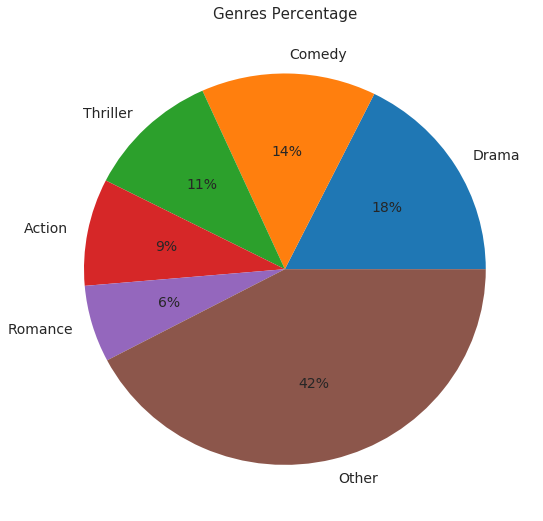

In [42]:
#plot the result in pie chart
c['Percentage'].plot(kind='pie',figsize=(9,9),fontsize=14,autopct='%1.0f%%')
plt.title('Genres Percentage',fontsize=15)
plt.ylabel('')

We can observe from this pie chart that Drama is the most popular of the top five genres. This indicates that nearly one out of every five films or television episodes falls into the Drama category.

However, we can see that these top 5 genres only account for slightly more than half of the total number of films/shows produced; there are numerous additional, lesser-known genres that, when combined, account for a significant fraction of the total.

We can also observe that just because a genre generates more cash than others does not always imply that it will be one of the most often produced genres.

## Conclusions

I asked questions that Production Companies could find beneficial throughout my data study, and I came to a few conclusions:
It is ideal to release a film or television show around June or December, since I can confidently state that those months are the most popular and generate the greatest cash. This might be because families are seeking for activities to do together in the summer and winter.

Short films (less than 10 minutes) are likely to get a mid-to-high rating, while TV series (more than 300 minutes) routinely have higher-than-average ratings, according to the findings I've reached in examining the association between ratings and runtime. Films/shows having a duration of approximately 100 minutes have a wide range of ratings, ranging from low to high, whereas films with a runtime of more than or less than 100 minutes tend to have mid-to-high ratings. Users appear to be more amicable at first sight of the scatterplot, giving largely mid-to-high ratings overall, therefore production firms will want to make sure their film/show gets reviewed on TMDB.


If you're a production business looking for the highest-grossing genres, my bar chart above reveals that Adventure, Action, and Science Fiction were the most popular genres among the highest-grossing films/series.
You may deduce that if you generate such genres, you are more likely to earn more money.

Lastely, I discovered that just one of the highest-earning genres is in the top five most commonly created genres when I computed the percentages for each genre (Action).Perhaps this is due to the fact that adventure and science fiction films are more expensive to produce.create in such a way that they are produced infrequently, or perhaps production businesses desire to Focus on genres that are more popular with the general public, not necessarily genres that are more popular with the general public.generate the most income Whatever the reason, I can confidently state that just because one genre earns more money than another doesn't guarantee it's better.believe it will be one of the most popular genres to make.

## Limitations
Many videos were eliminated during the cleaning step owing to insufficient data provided. There were 10,866 movie entries in the original dataset, but only 10,842 in the cleaned data set, indicating that about small percentage of the entries were eliminated. Of course, this will affect all of the answers discovered.

During the analysis of the revenue data, no normalisation, exchange rate, or currency conversion were taken into account. The study was restricted to the numerical values provided.

A few remarks on my data cleaning: I filled all of the 0 values with their means in the runtime, budget adj, and revenue adj variables. Instead of using the mean, I might have utilised regression to identify like-properties to fill the 0 values, which could have been more accurate.

In [43]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0